In [4]:
# Import statments and plot figures inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# Read in the produce dataset
a = pd.read_csv('produce_dataset_segments.csv')
a.head()

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,produce_item_flag,organic_item_flag,cust_total_produce_purchased,cust_organic_produce_purchased,organic_%,segment
0,0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1,5,3,0.6,Moderate Organic
1,1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1,5,3,0.6,Moderate Organic
2,2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0,5,3,0.6,Moderate Organic
3,3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0,5,3,0.6,Moderate Organic
4,4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1,5,3,0.6,Moderate Organic


In [6]:
# create a df that is grouped by organic segment
by_segment = a.groupby('segment')
by_segment

In [7]:
super_organic_group = by_segment.get_group('Super Organic')
super_organic_group

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,produce_item_flag,organic_item_flag,cust_total_produce_purchased,cust_organic_produce_purchased,organic_%,segment
86,86,4,3,691089,4,15,21.0,37646,Organic Gala Apples,4,0,24,fresh fruits,1,1,2,2,1.00,Super Organic
87,87,4,3,691089,4,15,21.0,19057,Organic Large Extra Fancy Fuji Apple,7,0,24,fresh fruits,1,1,2,2,1.00,Super Organic
215,215,9,1,280530,1,17,NaN,27966,Organic Raspberries,3,0,123,packaged vegetables fruits,1,1,8,8,1.00,Super Organic
216,216,9,1,280530,1,17,NaN,38159,Organic Yellow Peaches,8,0,24,fresh fruits,1,1,8,8,1.00,Super Organic
217,217,9,2,2762092,0,14,6.0,38159,Organic Yellow Peaches,2,1,24,fresh fruits,1,1,8,8,1.00,Super Organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888156,9888156,206207,15,2991173,5,10,7.0,13176,Bag of Organic Bananas,2,1,24,fresh fruits,1,1,50,47,0.94,Super Organic
9888157,9888157,206207,15,2991173,5,10,7.0,38383,Organic White Onions,14,0,83,fresh vegetables,1,1,50,47,0.94,Super Organic
9888158,9888158,206207,15,2991173,5,10,7.0,47209,Organic Hass Avocado,15,1,24,fresh fruits,1,1,50,47,0.94,Super Organic
9888159,9888159,206207,16,1005822,2,7,18.0,13176,Bag of Organic Bananas,4,1,24,fresh fruits,1,1,50,47,0.94,Super Organic


# Day of Week analysis

In [2]:
def dow_detail(group):
    return group.order_dow.value_counts(normalize = True)

In [3]:
dow_detail(super_organic_group)

NameError: name 'super_organic_group' is not defined

In [54]:
# build dow dataframe with dow_detail function
dow_df = by_segment.apply(dow_detail).unstack()

#rename columns (asume 0 is Sat)
dow_df.columns = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']

# change index order to reflect segmentation scale: Never to Super
dow_df = dow_df.reindex(index = ['Never Organic','Organic Taster', 'Moderate Organic', 'Super Organic'])

dow_df.style.format('{:.0%}')

,Sat,Sun,Mon,Tue,Wed,Thur,Fri
segment,,,,,,,
Never Organic,18%,17%,13%,12%,12%,13%,14%
Organic Taster,20%,18%,13%,11%,11%,13%,14%
Moderate Organic,21%,18%,13%,11%,11%,12%,14%
Super Organic,19%,18%,13%,12%,12%,13%,13%


In [1]:
fig, ax = plt.subplots(figsize=(10,2)) 
sns.heatmap(dow_df, annot = True, cmap = 'Blues', alpha = .8, fmt=".0%", cbar = False)
plt.title('Heatmap of Order Day of Week by Organic Segment')
plt.xlabel('Day of Week')
plt.ylabel('Segment')
pass

NameError: name 'plt' is not defined

# Time of day analysis

In [57]:
def tod_detail(group):
    return group.order_hour_of_day.value_counts(normalize = True)

In [60]:
# build dow dataframe with dow_detail function
tod_df = by_segment.apply(tod_detail).unstack()

# change index order to reflect segmentation scale: Never to Super
tod_df = tod_df.reindex(index = ['Never Organic','Organic Taster', 'Moderate Organic', 'Super Organic'])

tod_df.style.format('{:.0%}')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
segment,,,,,,,,,,,,,,,,,,,,,,,,
Never Organic,1%,0%,0%,0%,0%,0%,1%,2%,5%,7%,9%,9%,8%,8%,8%,8%,8%,7%,6%,4%,3%,2%,2%,1%
Organic Taster,1%,0%,0%,0%,0%,0%,1%,3%,5%,8%,9%,9%,8%,8%,8%,8%,8%,6%,5%,4%,3%,3%,2%,1%
Moderate Organic,1%,0%,0%,0%,0%,0%,1%,3%,5%,7%,8%,8%,8%,8%,8%,8%,8%,6%,5%,4%,3%,3%,2%,1%
Super Organic,1%,0%,0%,0%,0%,0%,1%,3%,5%,7%,8%,8%,8%,8%,8%,8%,8%,7%,5%,4%,3%,2%,2%,1%


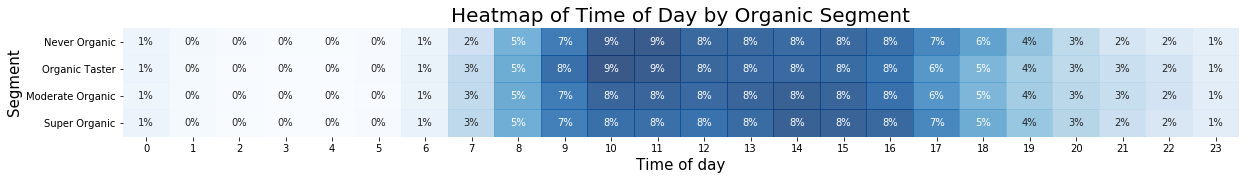

In [91]:
fig, ax = plt.subplots(figsize=(20,2)) 
sns.heatmap(tod_df, annot = True, cmap = 'Blues', alpha = .8, fmt=".0%", cbar = False)
plt.title('Heatmap of Time of Day by Organic Segment', fontsize=20)
plt.xlabel('Time of day', fontsize=15)
plt.ylabel('Segment', fontsize=15)
pass

# see if can look at by Day of week - Optional

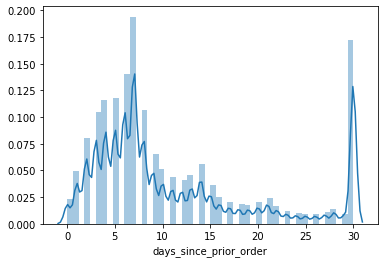

In [94]:
sns.distplot(a['days_since_prior_order'])

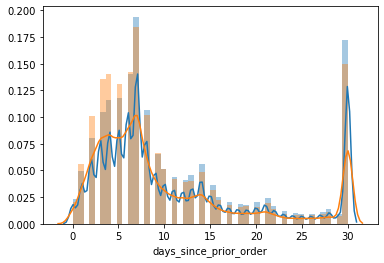

In [95]:
sns.distplot(a['days_since_prior_order'])
sns.distplot(super_organic_group['days_since_prior_order'])

In [102]:
my_pal = {"Never Organic": "#1F77B4", "Organic Taster": "#2CA02C", "Moderate Organic":"#FF7F0E", "Super Organic":"#D62728"}


MemoryError: Unable to allocate 1.03 GiB for an array with shape (138437292,) and data type float64

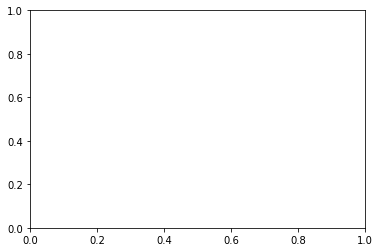

In [104]:
sns.kdeplot(
   data=a, x="produce_item_flag",
   fill=True, common_norm=False, palette="my_pal",
   alpha=.5, linewidth=0)


In [100]:
a

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,produce_item_flag,organic_item_flag,cust_total_produce_purchased,cust_organic_produce_purchased,organic_%,segment
0,0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1,5,3,0.60,Moderate Organic
1,1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1,5,3,0.60,Moderate Organic
2,2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0,5,3,0.60,Moderate Organic
3,3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0,5,3,0.60,Moderate Organic
4,4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1,5,3,0.60,Moderate Organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1,20,9,0.45,Moderate Organic
9888374,9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0,20,9,0.45,Moderate Organic
9888375,9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0,20,9,0.45,Moderate Organic
9888376,9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0,20,9,0.45,Moderate Organic
